<a href="https://colab.research.google.com/github/MohamadElnomrossie/Omdena-seniment-analysis/blob/rest_ML_models(Naive_Bayes)/Arabic_Standard_Sentiment_Analysis_AM_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![image.png](attachment:image.png)

data source: final_Text_clean

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
!pip install jupyterthemes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [ ]:
# Load the data

ST_df=pd.read_csv('final_text.csv')


In [ ]:
ST_df


,final,label,length
0,رجل يرفع شعار الحريه يدعو لرفع الظلم المراه او...,2,31
1,صفاء الهاشم سيده كويتيه المراه الوحيده حاليا م...,2,27
2,حقوق المراه عينك مو دكتور واحدحثاله بلدنا بلد ...,2,40
3,شخصيا حقوق المراه لانو بالجد الدستور السوداني ...,2,42
4,حق حقوق المراه مثل الرجل يريد وحده زينه واخلاق...,2,21
...,...,...,...
229974,افكار تقليديه استطاعت ويندي كوب ابنه ال عاما ت...,0,14
229975,مليون بريد الكتروني ترسل عبر الانترنت دقيقه جو...,0,16
229976,اعرف دستورك يوميا د حمزاوي حمله دستورنا حياتنا,0,8
229977,الحمله مرحله جديده الاعلان الرسمي للدكتور عبد ...,0,14


In [ ]:
ST_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229979 entries, 0 to 229978
Data columns (total 3 columns):
final     229958 non-null object
label     229979 non-null int64
length    229979 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.3+ MB


In [ ]:
ST_df.describe()

,label,length
count,229979.000000,229979.000000
mean,1.211128,27.882559
std,0.819948,51.708617
min,0.000000,0.000000
25%,0.000000,8.000000
50%,1.000000,14.000000
75%,2.000000,27.000000
max,2.000000,2279.000000


In [ ]:
ST_df['final']

0         رجل يرفع شعار الحريه يدعو لرفع الظلم المراه او...
1         صفاء الهاشم سيده كويتيه المراه الوحيده حاليا م...
2         حقوق المراه عينك مو دكتور واحدحثاله بلدنا بلد ...
3         شخصيا حقوق المراه لانو بالجد الدستور السوداني ...
4         حق حقوق المراه مثل الرجل يريد وحده زينه واخلاق...
                                ...                        
229974    افكار تقليديه استطاعت ويندي كوب ابنه ال عاما ت...
229975    مليون بريد الكتروني ترسل عبر الانترنت دقيقه جو...
229976       اعرف دستورك يوميا د حمزاوي حمله دستورنا حياتنا
229977    الحمله مرحله جديده الاعلان الرسمي للدكتور عبد ...
229978                                 تونس حلقه واحد اربعه
Name: final, Length: 229979, dtype: object

MINI CHALLENGE #1: 
- Drop the 'id' column from the DataFrame. 
- Ensure that the column has been succesfully dropped. 

In [ ]:
ST_df.dropna(inplace=True)

In [ ]:
ST_df

,final,label,length
0,رجل يرفع شعار الحريه يدعو لرفع الظلم المراه او...,2,31
1,صفاء الهاشم سيده كويتيه المراه الوحيده حاليا م...,2,27
2,حقوق المراه عينك مو دكتور واحدحثاله بلدنا بلد ...,2,40
3,شخصيا حقوق المراه لانو بالجد الدستور السوداني ...,2,42
4,حق حقوق المراه مثل الرجل يريد وحده زينه واخلاق...,2,21
...,...,...,...
229974,افكار تقليديه استطاعت ويندي كوب ابنه ال عاما ت...,0,14
229975,مليون بريد الكتروني ترسل عبر الانترنت دقيقه جو...,0,16
229976,اعرف دستورك يوميا د حمزاوي حمله دستورنا حياتنا,0,8
229977,الحمله مرحله جديده الاعلان الرسمي للدكتور عبد ...,0,14


In [ ]:
ST_df.shape

(229958, 3)

In [ ]:
ST_df.head(1000)

,final,label,length
0,رجل يرفع شعار الحريه يدعو لرفع الظلم المراه او...,2,31
1,صفاء الهاشم سيده كويتيه المراه الوحيده حاليا م...,2,27
2,حقوق المراه عينك مو دكتور واحدحثاله بلدنا بلد ...,2,40
3,شخصيا حقوق المراه لانو بالجد الدستور السوداني ...,2,42
4,حق حقوق المراه مثل الرجل يريد وحده زينه واخلاق...,2,21
...,...,...,...
995,الكلام قليل بحقك ياسيدي حفظك الله ورعاك غرد بح...,2,12
996,الشعب يحبك غرد بحبك لمحمد بن سلمان,2,7
997,التثبيت للعقود والبنود يامحمد وشكرا غرد بحبك ل...,2,10
998,الاحرف والمعاني تعجز وصف حبه ابو سلمان حبه عظي...,2,14


In [ ]:
ST_df = ST_df.sample(n=10000,replace=True)

In [ ]:
ST_df

,final,label,length
177025,اقصد اخر سؤال جاني بالخاص,0,5
85027,كعاده بهاء طاهر روايه عذبه الملامح والاحداث وك...,2,23
38803,البرلمان اسماعيل منتدي شباب العالم ناجح ومداخل...,2,10
96253,المحتوي جيد و العنوان عبقري و كاني بقرا كتاب ف...,2,42
119851,المطعم قضيت اجمل لحظات حياتي زوجي مرغوب كل لان...,1,58
...,...,...,...
56687,خالص ي مريم,2,3
211255,اليس العيب تحفظ الاغي وتكرر نفس السوره صلاه,0,8
55491,اسالك اللهم يوم جديد زدته حياتنا تزيدنا معه اي...,2,15
195432,لاعدمناكم ولايوفيكم الجزاء الديان سريع الحساب ...,0,11


In [ ]:
ST_df = ST_df.sample(n=100,replace=True)

In [ ]:
ST_df 

,final,label,length
182886,السلام عليكم نقلنا كفاله العامل صاحب اقامه رقم...,0,11
221012,عندي امتحان باطنه وماقدرتش م اخلصها هدخل ع ال...,0,59
75753,كتاب رائع جدا افدني شخصيا جدا وصحح عندي مفام م...,2,19
109839,م سيء للغايه جراند ميدويست للشقق الفندقيه فندق...,1,127
205203,ارشيف اصدارات المركز العلاقات المصريه الاسرائي...,0,8
...,...,...,...
197437,ايجابيات و سلبيات سيتيزين ايكو درايف رجاليه ‫ ...,0,12
7752,موقع جدا مميز لقد اقمت لوحدي بشهر ابريل استمتع...,2,42
95117,الكتاب نفس فكره كتاب صناعه الذكاء الكثيره الال...,2,17
95856,نصيحه قالها احمد العايدي كنت تعتبرها روايه فات...,2,78


# TASK #3: EXPLORE DATASET

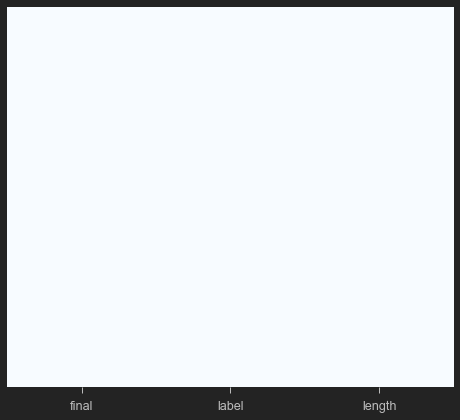

In [ ]:
 sns.heatmap(ST_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021888CBF648>,
      dtype=object)

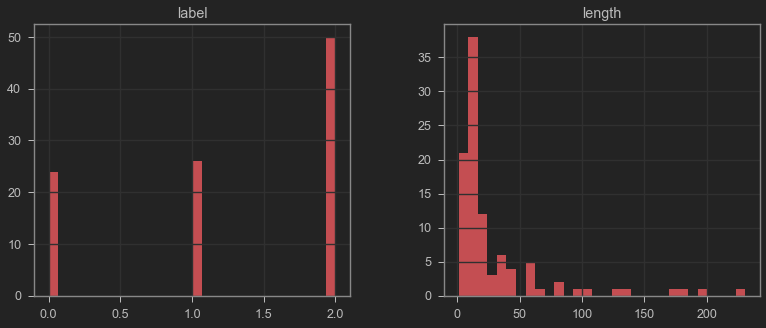

In [ ]:
ST_df.hist(bins = 30, figsize = (13,5), color = 'r')

MINI CHALLENGE #2: 
- Plot similar figure using seaborn countplot

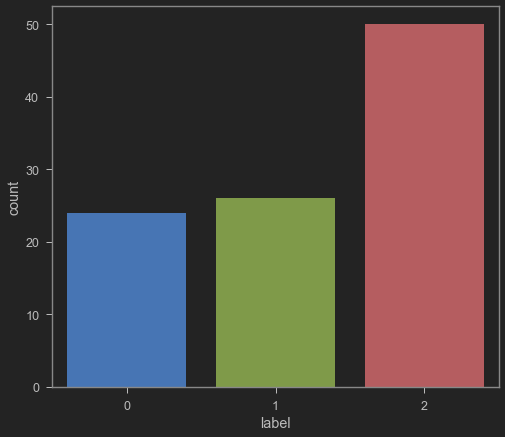

In [ ]:
sns.countplot(ST_df['label'],label = 'count')

In [ ]:
# Let's get the length of the message
ST_df['length']=ST_df['final'].apply(len)

In [ ]:
ST_df

,final,label,length
182886,السلام عليكم نقلنا كفاله العامل صاحب اقامه رقم...,0,58
221012,عندي امتحان باطنه وماقدرتش م اخلصها هدخل ع ال...,0,318
75753,كتاب رائع جدا افدني شخصيا جدا وصحح عندي مفام م...,2,105
109839,م سيء للغايه جراند ميدويست للشقق الفندقيه فندق...,1,716
205203,ارشيف اصدارات المركز العلاقات المصريه الاسرائي...,0,60
...,...,...,...
197437,ايجابيات و سلبيات سيتيزين ايكو درايف رجاليه ‫ ...,0,71
7752,موقع جدا مميز لقد اقمت لوحدي بشهر ابريل استمتع...,2,251
95117,الكتاب نفس فكره كتاب صناعه الذكاء الكثيره الال...,2,107
95856,نصيحه قالها احمد العايدي كنت تعتبرها روايه فات...,2,469


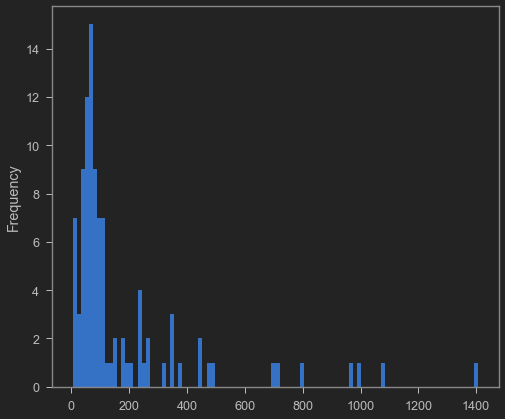

In [ ]:
ST_df['length'].plot(bins=100, kind='hist') 

In [ ]:
ST_df.describe()

,label,length
count,100.000000,100.000000
mean,1.260000,176.390000
std,0.824131,246.581226
min,0.000000,4.000000
25%,1.000000,55.750000
50%,1.500000,81.500000
75%,2.000000,182.500000
max,2.000000,1408.000000


In [ ]:
# Let's see the shortest message 
ST_df[ST_df['length'] == 4]['final'].iloc[0]

'حرام'

In [ ]:
ST_df[ST_df['length'] == 1408]['final'].iloc[0]

'الداده دودي بقت مامي مافيش حاجه تمنع الاقتباس تدوير القصه والتغير وتقديمها بشكل مختلف وجديد الابقاء الخط الرئيسي والتيمه الاساسيه للفيلم العكس تماما ده بيبقي دافع قوي لمشاهده روئ وافكار مختلفه تقدر تحدد معاها التاثيرات الدراميه المختلفه يتم تحريف القصه بشكل هزلي ومستفز سبيل تقديم صوره لايت ممكن نقف وندور الاسباب الحقيقه اللي دفعت بمؤلف ومخرج قدر الحرفيه والتميز لتقديم مثل العمل واعتقد المؤلف خالد جلال مؤلف فيلم الانسه مامي اتوجه ليه السؤال ده مش ح يعرف يجاوب الاقل اجابته ح تبقي مشوهه ومقترنه بان مافيش حاجه تمنع الاقتباس زي قولنا قبل كدا سلمنا بالامر الواقع وبحكايه الاقتباس ح نلاقي قصه الفيلم ماخوذه الفيلم الاجنبي رجل العائله للممثل نيكولاس كيدج عام ح نشوف التغير شخصيات العمل الرئيسيه فبدل بطل العمل اللي بتقوم قصه الفيلم رجل حنشوف تحول لسيده وده مش مشكله نهائيا تكون المشاهد الغير عقلانيه بنخلينا نرجع تاني نسال وندور فمثلا اغلب السيدات تتمني تصبح يكون لديها اطفال جزمنا بان السيدات تعير لذلك الحلم اهتمام حنلاقي باب تاني اتفتح ازاي تقدم فيلم عائلي موجه الاخص للاسره والاطفال وتقدم المواقف 

In [ ]:
N=ST_df[ST_df['label']==0]

In [ ]:
N

,final,label,length
182886,السلام عليكم نقلنا كفاله العامل صاحب اقامه رقم...,0,58
221012,عندي امتحان باطنه وماقدرتش م اخلصها هدخل ع ال...,0,318
205203,ارشيف اصدارات المركز العلاقات المصريه الاسرائي...,0,60
183333,عندك ادخل واختار جهاز بعقد يمكن يعطونك,0,39
213133,قال الله تعالي لموسي وهارون عليهما السلام اجيب...,0,55
218033,احرق القصه تستحق القراءه لمن يريد متابعه عقليا...,0,237
199242,تعرف استراليا بالكنغر والكوالا فا تعرف ايضا ب...,0,704
200705,وجبه برقر بطاطس وبيبسي مطعم البيك ب ريالات,0,42
180890,السلام عليكم اقدر اصرف شيك باسمي بطاقه الاحوال...,0,53
176941,عندي قولي واقول,0,16


In [ ]:
negative=ST_df[ST_df['label']==1]

In [ ]:
negative

,final,label,length
109839,م سيء للغايه جراند ميدويست للشقق الفندقيه فندق...,1,716
107464,تنشر الفساد الدعوه ممنهجه لافساد المجتمع و سلخ...,1,229
166358,لماذا يتاخر تصحيح الخطا يختفي الاختفاء الجهل ب...,1,350
116864,البنوك السعوديه باي حق يالراجحي تسحب القسط الا...,1,72
151669,الاتحاد يتوج بطلا للدوري الاتحاد مهدد بالهبوط ...,1,77
153128,رجعنا الصداره شاءالله تنتهي الصداره,1,35
145664,جيدي بتس سرقوا نص ملابسه,1,24
160983,اخيرا خرجت ام بدور البهجه ف صفحه وللاسف ملقتش ...,1,965
149332,اعداء الامه حيتجننوا شنب الشيخ خالد الجندي انك...,1,94
164034,بجد بيشد ل جزء كام صفحه كده بحس توهت و اقراها ...,1,176


In [ ]:
positive=ST_df[ST_df['label']==2]

In [ ]:
positive

,final,label,length
75753,كتاب رائع جدا افدني شخصيا جدا وصحح عندي مفام م...,2,105
74856,قراتها اعوام ربما قدر براعه التصوير لكل شخصيه ...,2,92
35957,فخامه الرئيس عبد الفتاح السيسي اعلنها للجميع م...,2,158
47331,ناس باقصي ضميري محله ناس الغلا واحترامي غالين ...,2,80
55660,الناس يمشون ع نياتهمم امشي ع رجلي مساكم,2,40
44898,بالصبر تفتح ابواب السعاده وبالشكر تدوم النعم و...,2,124
97513,احي الشاعر العراقي المناضل كنت الكويت تنشر لاف...,2,143
49053,معكم الذيبه فرح,2,15
32292,مطعم فوندا المطاعم زلت ارجع زيارتي الاولي قبل ...,2,795
12157,الراحه النفسيه والهدوء والجوده بفندق البارون ا...,2,446


# TASK #3: PLOT THE WORDCLOUD

In [ ]:
sentences=ST_df['final'].tolist()

In [ ]:
sentences

['السلام عليكم نقلنا كفاله العامل صاحب اقامه رقم و يضهر ابشر',
 ' عندي امتحان باطنه وماقدرتش م اخلصها هدخل ع الدكتور احكيله حكايه احمد كمال ونضاله بجد شدتني جداا وماقدرتش  اخلصها بالنسبه لتجربه كاتب لاول مره احلي الحاجات اللي قريتها هوه مشروع كاتب ممتاز رد الفعل تراب الماس اقدر اقول نجح د بجدراه قعد اول صفحه يوصف وصف ملوش معني اسلوبه ف الكتابه يخليك برده تنسي انك عديت ال صفحه اصلا',
 'كتاب رائع جدا افدني شخصيا جدا وصحح عندي مفام منهان القراءه هوايه  منهج حياه افكار الكتاب رائعه ومفيده جدا',
 'م سيء للغايه جراند ميدويست للشقق الفندقيه فندق بر دبي عادي جدا يتم تغير ملاءات السرير يوم والبطانيات ت قديمه جدا وتجعلك تهرش بالليل واضطررنا لطلب خدمه الغرف لتغير الملاءات ايام وت الاسره مقلقه وتصدر الكثير الضوضاء الحركه بالليل ت الارائك الموجوده الغرفه قذره للغايه يمه و علينا نضع ملاءه للجلوس عليها وت تصلح للجلوس عليها وت مريحه جدا و علينا نطلب خدمه الغرف عده مرات لطلب اشياء بسيطه مثل لفات المرحاض ومناشف نظيفه لانها يتم وضعها دائما عندما تم تنظيف الغرف و لدينا غساله تعمل ايضا وتعمل عده ساعات توقف

In [ ]:
len(sentences)

100

In [ ]:
sentences_as_one_string=" ".join(sentences)

In [ ]:
sentences_as_one_string

'السلام عليكم نقلنا كفاله العامل صاحب اقامه رقم و يضهر ابشر  عندي امتحان باطنه وماقدرتش م اخلصها هدخل ع الدكتور احكيله حكايه احمد كمال ونضاله بجد شدتني جداا وماقدرتش  اخلصها بالنسبه لتجربه كاتب لاول مره احلي الحاجات اللي قريتها هوه مشروع كاتب ممتاز رد الفعل تراب الماس اقدر اقول نجح د بجدراه قعد اول صفحه يوصف وصف ملوش معني اسلوبه ف الكتابه يخليك برده تنسي انك عديت ال صفحه اصلا كتاب رائع جدا افدني شخصيا جدا وصحح عندي مفام منهان القراءه هوايه  منهج حياه افكار الكتاب رائعه ومفيده جدا م سيء للغايه جراند ميدويست للشقق الفندقيه فندق بر دبي عادي جدا يتم تغير ملاءات السرير يوم والبطانيات ت قديمه جدا وتجعلك تهرش بالليل واضطررنا لطلب خدمه الغرف لتغير الملاءات ايام وت الاسره مقلقه وتصدر الكثير الضوضاء الحركه بالليل ت الارائك الموجوده الغرفه قذره للغايه يمه و علينا نضع ملاءه للجلوس عليها وت تصلح للجلوس عليها وت مريحه جدا و علينا نطلب خدمه الغرف عده مرات لطلب اشياء بسيطه مثل لفات المرحاض ومناشف نظيفه لانها يتم وضعها دائما عندما تم تنظيف الغرف و لدينا غساله تعمل ايضا وتعمل عده ساعات توقف ورغم شكوانا 

In [ ]:
t=sentences_as_one_string

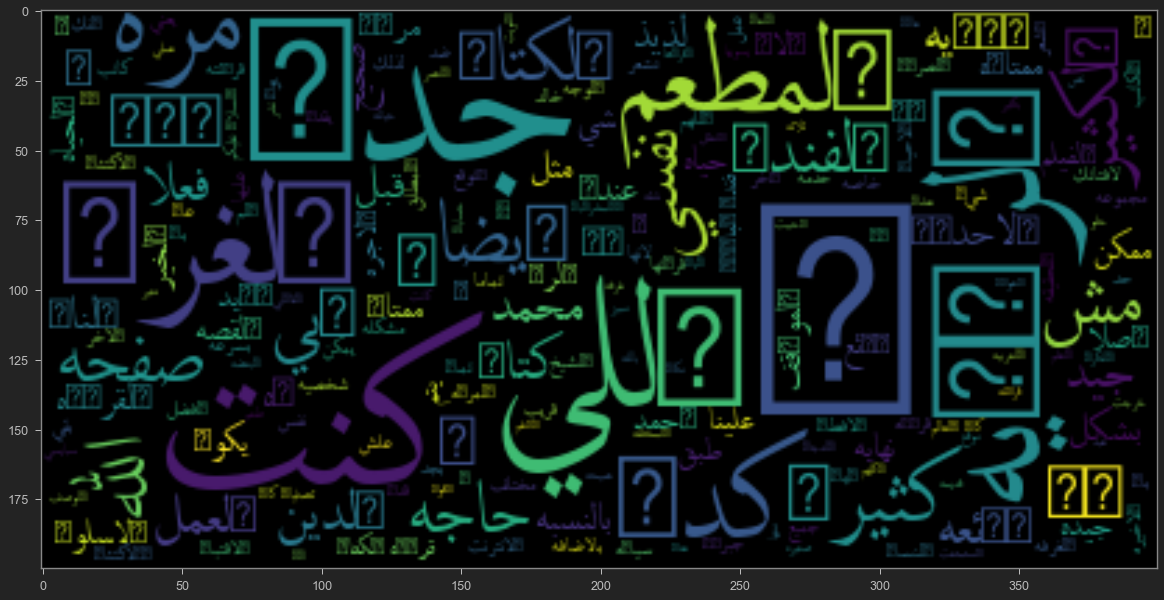

In [ ]:
import os
!pip install python-bidi
!pip install arabic_reshaper
import arabic_reshaper
from bidi.algorithm import get_display
import codecs 
!pip install WordCloud
from wordcloud import WordCloud
#f=codecs.open('val_labr.csv','r','utf-8')#read the whole text 
text=arabic_reshaper.reshape(t) 
#make the text readable for non arabic liabiry 
text=get_display(text)
wordcloud=WordCloud(font_path='fonts/arabtype.ttf').generate(text)
plt.figure(figsize=(20,20))

plt.imshow(wordcloud,interpolation= "bilinear")
plt.show()

# TASK #4: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:

Test = 'Good morning beautiful people :)...I am having fun learning Machine learning and AI!!'

In [ ]:
test_punc_removed=[char for char in Test if char not in string.punctuation]

In [ ]:
test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [ ]:
# Join the characters again to form the string.
Test_punc_removed_join =''.join(test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people I am having fun learning Machine learning and AI'

MINI CHALLENGE #5: 
- Remove punctuations using a different method


In [ ]:
Test_punc_removed =[]
for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)
Test_punc_removed_join=''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people I am having fun learning Machine learning and AI'

# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [ ]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayne.elec.store\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('Arabic')

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [ ]:
Test_punc_removed_join_clean =[ word for word in t.split() if word.lower() not in stopwords.words('Arabic')]

In [ ]:
Test_punc_removed_join_clean = ''.join(t)
Test_punc_removed_join_clean

'السلام عليكم نقلنا كفاله العامل صاحب اقامه رقم و يضهر ابشر  عندي امتحان باطنه وماقدرتش م اخلصها هدخل ع الدكتور احكيله حكايه احمد كمال ونضاله بجد شدتني جداا وماقدرتش  اخلصها بالنسبه لتجربه كاتب لاول مره احلي الحاجات اللي قريتها هوه مشروع كاتب ممتاز رد الفعل تراب الماس اقدر اقول نجح د بجدراه قعد اول صفحه يوصف وصف ملوش معني اسلوبه ف الكتابه يخليك برده تنسي انك عديت ال صفحه اصلا كتاب رائع جدا افدني شخصيا جدا وصحح عندي مفام منهان القراءه هوايه  منهج حياه افكار الكتاب رائعه ومفيده جدا م سيء للغايه جراند ميدويست للشقق الفندقيه فندق بر دبي عادي جدا يتم تغير ملاءات السرير يوم والبطانيات ت قديمه جدا وتجعلك تهرش بالليل واضطررنا لطلب خدمه الغرف لتغير الملاءات ايام وت الاسره مقلقه وتصدر الكثير الضوضاء الحركه بالليل ت الارائك الموجوده الغرفه قذره للغايه يمه و علينا نضع ملاءه للجلوس عليها وت تصلح للجلوس عليها وت مريحه جدا و علينا نطلب خدمه الغرف عده مرات لطلب اشياء بسيطه مثل لفات المرحاض ومناشف نظيفه لانها يتم وضعها دائما عندما تم تنظيف الغرف و لدينا غساله تعمل ايضا وتعمل عده ساعات توقف ورغم شكوانا 

In [ ]:
Test_punc_removed_join_clean # Only bimportant (no so common) words are right

'السلام عليكم نقلنا كفاله العامل صاحب اقامه رقم و يضهر ابشر  عندي امتحان باطنه وماقدرتش م اخلصها هدخل ع الدكتور احكيله حكايه احمد كمال ونضاله بجد شدتني جداا وماقدرتش  اخلصها بالنسبه لتجربه كاتب لاول مره احلي الحاجات اللي قريتها هوه مشروع كاتب ممتاز رد الفعل تراب الماس اقدر اقول نجح د بجدراه قعد اول صفحه يوصف وصف ملوش معني اسلوبه ف الكتابه يخليك برده تنسي انك عديت ال صفحه اصلا كتاب رائع جدا افدني شخصيا جدا وصحح عندي مفام منهان القراءه هوايه  منهج حياه افكار الكتاب رائعه ومفيده جدا م سيء للغايه جراند ميدويست للشقق الفندقيه فندق بر دبي عادي جدا يتم تغير ملاءات السرير يوم والبطانيات ت قديمه جدا وتجعلك تهرش بالليل واضطررنا لطلب خدمه الغرف لتغير الملاءات ايام وت الاسره مقلقه وتصدر الكثير الضوضاء الحركه بالليل ت الارائك الموجوده الغرفه قذره للغايه يمه و علينا نضع ملاءه للجلوس عليها وت تصلح للجلوس عليها وت مريحه جدا و علينا نطلب خدمه الغرف عده مرات لطلب اشياء بسيطه مثل لفات المرحاض ومناشف نظيفه لانها يتم وضعها دائما عندما تم تنظيف الغرف و لدينا غساله تعمل ايضا وتعمل عده ساعات توقف ورغم شكوانا 

In [ ]:
#Test_punc_removed =[]
#for char in t :
   # if char not in stopwords.words('Arabic'):
   #     Test_punc_removed.append(char)
#Test_punc_removed_join

'Good morning beautiful people I am having fun learning Machine learning and AI'

MINI CHALLENGE #6: 
- For the following text, create a pipeline to remove punctuations followed by removing stopwords

In [ ]:
#mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [ ]:
t

'السلام عليكم نقلنا كفاله العامل صاحب اقامه رقم و يضهر ابشر  عندي امتحان باطنه وماقدرتش م اخلصها هدخل ع الدكتور احكيله حكايه احمد كمال ونضاله بجد شدتني جداا وماقدرتش  اخلصها بالنسبه لتجربه كاتب لاول مره احلي الحاجات اللي قريتها هوه مشروع كاتب ممتاز رد الفعل تراب الماس اقدر اقول نجح د بجدراه قعد اول صفحه يوصف وصف ملوش معني اسلوبه ف الكتابه يخليك برده تنسي انك عديت ال صفحه اصلا كتاب رائع جدا افدني شخصيا جدا وصحح عندي مفام منهان القراءه هوايه  منهج حياه افكار الكتاب رائعه ومفيده جدا م سيء للغايه جراند ميدويست للشقق الفندقيه فندق بر دبي عادي جدا يتم تغير ملاءات السرير يوم والبطانيات ت قديمه جدا وتجعلك تهرش بالليل واضطررنا لطلب خدمه الغرف لتغير الملاءات ايام وت الاسره مقلقه وتصدر الكثير الضوضاء الحركه بالليل ت الارائك الموجوده الغرفه قذره للغايه يمه و علينا نضع ملاءه للجلوس عليها وت تصلح للجلوس عليها وت مريحه جدا و علينا نطلب خدمه الغرف عده مرات لطلب اشياء بسيطه مثل لفات المرحاض ومناشف نظيفه لانها يتم وضعها دائما عندما تم تنظيف الغرف و لدينا غساله تعمل ايضا وتعمل عده ساعات توقف ورغم شكوانا 

In [ ]:
challege = [ char     for char in t  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('Arabic')  ] 

In [ ]:
challenge

['السلام',
 'عليكم',
 'نقلنا',
 'كفاله',
 'العامل',
 'صاحب',
 'اقامه',
 'رقم',
 'و',
 'يضهر',
 'ابشر',
 'عندي',
 'امتحان',
 'باطنه',
 'وماقدرتش',
 'م',
 'اخلصها',
 'هدخل',
 'ع',
 'الدكتور',
 'احكيله',
 'حكايه',
 'احمد',
 'كمال',
 'ونضاله',
 'بجد',
 'شدتني',
 'جداا',
 'وماقدرتش',
 'اخلصها',
 'بالنسبه',
 'لتجربه',
 'كاتب',
 'لاول',
 'مره',
 'احلي',
 'الحاجات',
 'اللي',
 'قريتها',
 'هوه',
 'مشروع',
 'كاتب',
 'ممتاز',
 'رد',
 'الفعل',
 'تراب',
 'الماس',
 'اقدر',
 'اقول',
 'نجح',
 'د',
 'بجدراه',
 'قعد',
 'اول',
 'صفحه',
 'يوصف',
 'وصف',
 'ملوش',
 'معني',
 'اسلوبه',
 'ف',
 'الكتابه',
 'يخليك',
 'برده',
 'تنسي',
 'انك',
 'عديت',
 'ال',
 'صفحه',
 'اصلا',
 'كتاب',
 'رائع',
 'جدا',
 'افدني',
 'شخصيا',
 'جدا',
 'وصحح',
 'عندي',
 'مفام',
 'منهان',
 'القراءه',
 'هوايه',
 'منهج',
 'حياه',
 'افكار',
 'الكتاب',
 'رائعه',
 'ومفيده',
 'جدا',
 'م',
 'سيء',
 'للغايه',
 'جراند',
 'ميدويست',
 'للشقق',
 'الفندقيه',
 'فندق',
 'بر',
 'دبي',
 'عادي',
 'جدا',
 'يتم',
 'تغير',
 'ملاءات',
 'السرير',
 'يوم',
 'وال

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

![image.png](attachment:image.png)

In [ ]:
'''from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)'''


In [ ]:
#print (vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [ ]:
#print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


### TASK #7: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('Arabic')]
    return Test_punc_removed_join_clean

In [ ]:
# Let's test the newly added function
ST_df_clean = ST_df['final'].apply(message_cleaning)

In [ ]:
print(ST_df_clean) # show the cleaned up version

182886    [السلام, عليكم, نقلنا, كفاله, العامل, صاحب, اق...
221012    [عندي, امتحان, باطنه, وماقدرتش, م, اخلصها, هدخ...
75753     [كتاب, رائع, جدا, افدني, شخصيا, جدا, وصحح, عند...
109839    [م, سيء, للغايه, جراند, ميدويست, للشقق, الفندق...
205203    [ارشيف, اصدارات, المركز, العلاقات, المصريه, ال...
                                ...                        
197437    [ايجابيات, و, سلبيات, سيتيزين, ايكو, درايف, رج...
7752      [موقع, جدا, مميز, لقد, اقمت, لوحدي, بشهر, ابري...
95117     [الكتاب, نفس, فكره, كتاب, صناعه, الذكاء, الكثي...
95856     [نصيحه, قالها, احمد, العايدي, كنت, تعتبرها, رو...
170238      [عاجلمقتل, واصابه, شخصا, ب, تفجير, سيطره, بابل]
Name: final, Length: 100, dtype: object


In [ ]:
print(ST_df_clean[7752])

['موقع', 'جدا', 'مميز', 'لقد', 'اقمت', 'لوحدي', 'بشهر', 'ابريل', 'استمتعت', 'كثيرا', 'موقعه', 'جذبني', 'كثيرا', 'واطلالته', 'رائعه', 'الغرف', 'صغيره', 'والافطار', 'مميز', 'الانترنت', 'مجاني', 'توفر', 'موقف', 'سياره', 'جيد', 'طاقم', 'الفندق', 'متعاون', 'ومرحب', 'اشكر', 'اخبرني', 'بالفندق', 'يصلح', 'لشخصين', 'الفندق', 'مبني', 'فتره', 'قديمه', 'جدا', 'والاضائه', 'جيده', 'كفايه']


In [ ]:
print(ST_df['final'][7752]) # show the original version

موقع جدا مميز لقد اقمت لوحدي بشهر ابريل استمتعت كثيرا موقعه جذبني كثيرا واطلالته رائعه الغرف صغيره والافطار مميز الانترنت مجاني توفر موقف سياره جيد طاقم الفندق متعاون ومرحب اشكر اخبرني بالفندق يصلح لشخصين الفندق مبني فتره قديمه جدا والاضائه جيده كفايه


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
ST_df_countvectorizer =CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(ST_df['final']).toarray() 


In [ ]:
ST_df_countvectorizer.shape

(100, 2198)

In [ ]:
ST_df_countvectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
#print(vectorizer.get_feature_names())


In [ ]:
print(ST_df_countvectorizer)  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
ST_df_countvectorizer.shape

(100, 2198)

In [ ]:
#tweets = pd.ST_df(ST_df_countvectorizer.toarray())


In [ ]:
X = ST_df_countvectorizer


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
y = ST_df['label']

In [ ]:
y

182886    0
221012    0
75753     2
109839    1
205203    0
         ..
197437    0
7752      2
95117     2
95856     2
170238    1
Name: label, Length: 100, dtype: int64

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

MINI CHALLENGE #8

![image.png](attachment:image.png)

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [ ]:
X.shape

(100, 2198)

In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

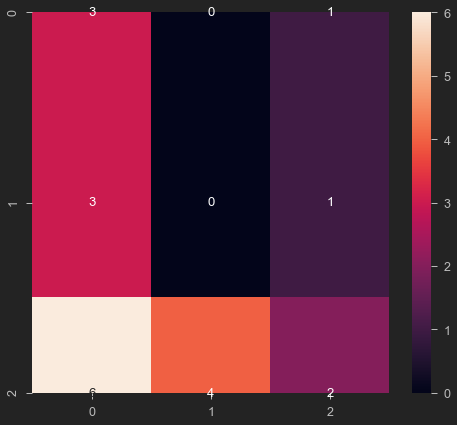

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.25      0.75      0.38         4
           1       0.00      0.00      0.00         4
           2       0.50      0.17      0.25        12

    accuracy                           0.25        20
   macro avg       0.25      0.31      0.21        20
weighted avg       0.35      0.25      0.23        20



![image.png](attachment:image.png)